# SIR vaccination with two risk classes
This is program 8.4 from page 306 of "Modelling Infectious Diseases in humnas and animals" by Keeling & Rohani. This is based on code written by Ilias Soumpasis.

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#parameters (in days)
beta=np.array([[1., 0.01],[0.01 ,0.1]]); #transmission matrix
gamma=np.array([0.1, 0.1]); #recovery rate
mu=np.array([0.2, 0.8])*5e-5; #natural death rate
p0=np.array([0.4, 0.1]); #proportions of individuals in the high and low risk groups that are vaccinated at birth

tV=50*365; #time at which vaccination starts

S0=np.array([0.1, 0.7]); #initial susceptible fractions 
I0=np.array([1e-5, 1e-5]); #initial infected fractions

ND=MaxTime=100*365; #number of days
TS=1.0 #time step for the integration

INPUT = np.hstack((S0,I0))

In [3]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP   
	MU=sum(mu)
	for i in range(2):
		Y[i]= mu[i]*(1-p[i]) - (beta[i,0]*V[2]+beta[i,1]*V[3])*V[i] - MU*V[i]
		Y[i+2]= (beta[i,0]*V[2]+beta[i,1]*V[3])*V[i] - gamma[i]*V[i+2] - MU*V[i+2]
	return Y   # For odeint

In [4]:
t_start = 0.0; t_end = tV; t_inc = TS
t_range1 = np.arange(t_start, t_end, t_inc)
t_start = tV; t_end = ND; t_inc = TS
t_range2 = np.arange(tV, t_end, t_inc)
T = np.hstack((t_range1, t_range2))

#no vaccination first
p=np.array([0,0])
RES1 = spi.odeint(diff_eqs,INPUT,t_range1)
#vaccination later
p=p0
RES2 = spi.odeint(diff_eqs,RES1[-1],t_range2)


S1 = np.hstack((RES1[:,0],RES2[:,0]))
S2 = np.hstack((RES1[:,1],RES2[:,1]))
I1 = np.hstack((RES1[:,2],RES2[:,2]))
I2 = np.hstack((RES1[:,3],RES2[:,3]))

TT = np.arange(len(S1))

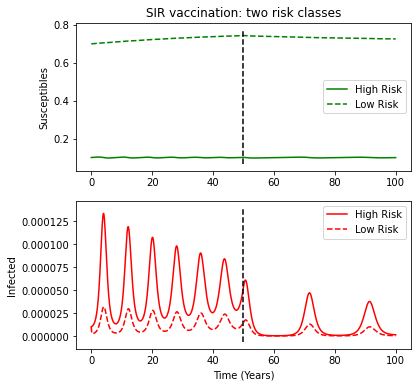

<Figure size 432x288 with 0 Axes>

In [9]:
fig=plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('SIR vaccination: two risk classes')

fig.add_subplot(211)
plt.plot(TT/365.0, S1, '-g')
plt.plot(TT/365.0, S2, '--g')
plt.legend(('High Risk','Low Risk'), loc=0)
ll=plt.ylim()
tVV=np.repeat([tV/365.],len(ll))
plt.plot(tVV, ll, '--k')
plt.ylabel('Susceptibles')

fig.add_subplot(212)
plt.plot(TT/365.0, I1, '-r')
plt.plot(TT/365.0, I2, '--r')
ll=plt.ylim()
tVV=np.repeat([tV/365.],len(ll))
plt.plot(tVV, ll, '--k')
plt.ylabel('Infected')
plt.legend(('High Risk','Low Risk'), loc=0)
plt.xlabel('Time (Years)')

plt.show()
plt.savefig('SIR_vaccination_two_risk_groups.pdf')